In [48]:
import requests

In [49]:
from bs4 import BeautifulSoup
import numpy as np
import re

In [ ]:
brand_name=[]
Model = []
color = []
Price =[]
Ram = []
Rom = []
Screen_size=[]
Camera=[]
Battery=[]
rating_1 = []
title = []
reviews_rating =[]

for i in range(1,46):
    url = f"https://www.flipkart.com/search?q=mobiles&otracker=AS_Query_HistoryAutoSuggest_3_0&otracker1=AS_Query_HistoryAutoSuggest_3_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=3&as-type=HISTORY&page={i}"
    page = requests.get(url)
    soup = BeautifulSoup(page.text)

    for i in soup.find_all("div",class_= "KzDlHZ"):
        title.append(i.text)

    

    for i in soup.find_all("div",class_="tUxRFH"):    #Container
        r = i.find("div",class_="XQDdHH")    #Rating for that container
        if r:
            rating_1.append(r.text)
        else:
            rating_1.append(np.nan)


    for i in soup.find_all("div",class_="tUxRFH"):   #container
        text = i.text   #only text
    
        ram = re.findall(r"(\d+)\sGB\sRAM",text)   #pattern for RAM
        if ram:
            Ram.append(ram[0])
        else:
            Ram.append(np.nan)

        ss = re.findall(r"\((\d+\.?\d+)\sinch",text)  #pattern for Screen_size
        if ss:
            Screen_size.append(ss[0])
        else:
            Screen_size.append(np.nan)

        camera = re.findall(r"Display(.+)\sCamera\d+\smAh",text)   #pattern for Camera
        if camera:
            Camera.append(camera[0])
        else:
            Camera.append(np.nan)

        battery = re.findall(r"(\d+)\smAh",text)   #pattern for battery
        if battery:
            Battery.append(battery[0])
        else:
            Battery.append(np.nan)

    for i in soup.find_all("div",class_="tUxRFH"):   #Container
        r1 = i.find("div",class_="Nx9bqj _4b5DiR")    #Price
        if r1:
            Price.append(r1.text)
        else:
            Price.append(np.nan)

    for i in soup.find_all("div",class_="tUxRFH"):   #Container
        r1 = i.find("span",class_="Wphh3N")   #Rating for that container
        if r1:
            reviews_rating.append(r1.text)
        else:
            reviews_rating.append(np.nan)
    


In [51]:
brand_name=[]
Model = []
color = []
Rom = []

for i in title:
    regex = re.findall(r'(\w+)\s.+',i)
    if regex:
        brand_name.append(regex[0])
    else:
        brand_name.append(np.nan)

for i in title:
    regex = re.findall(r'\w+\s(.+)\(',i)
    if regex:
        Model.append(regex[0])
    else:
        Model.append(np.nan)

for i in title:
    regex = re.findall(r'\((\w+\s?+\w+)',i)
    if regex:
        color.append(regex[0])
    else:
        color.append(np.nan)

for i in title:
    regex = re.findall(r'\s.[0-9]+\s+GB',i)
    if regex:
        Rom.append(regex[0])
    else:
        Rom.append(np.nan)

In [52]:
len(brand_name)

0

In [ ]:
len(Model)

In [ ]:
len(color)

In [ ]:
len(Rom)

In [ ]:
len(Camera)

In [ ]:
len(Ram)

In [ ]:
len(reviews_rating)

In [ ]:
len(Screen_size)

In [ ]:
len(Battery)

In [ ]:
len(Price)

In [ ]:
data = {"Brand":brand_name,
       "Model":Model,
       "Camera":Camera,
       "Color":color,
       "RAM":Ram,
       "ROM":Rom,
       "Reviews and Rating":reviews_rating,
       "Screen_size":Screen_size,
       "Battery":Battery,
       "Price":Price
      }

In [ ]:
data

In [2]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
df.to_csv("phones.csv")

In [3]:
df = pd.read_csv(r"C:\Users\91966\Downloads\cleaned_mobile_dataset.csv")
df.head()

,Brand,Model,Camera,Color,RAM,ROM,Screen_size,Battery,Price,Ratings,Reviews
0,POCO,C71,32MP Rear Camera | 8MP Front,Cool Blue,6.0,128.0,6.88,5200.0,6799,23011.0,1109.0
1,POCO,C71,32MP Rear Camera | 8MP Front,Desert Gold,4.0,64.0,6.88,5200.0,6199,44601.0,2049.0
2,POCO,M7 5G,50MP Rear Camera | 8MP Front,Mint Green,6.0,128.0,6.88,5160.0,8999,54598.0,2580.0
3,POCO,C75 5G,50MP Rear Camera | 5MP Front,Enchanted Green,4.0,64.0,6.88,5160.0,7699,127288.0,5743.0
4,vivo,T4x 5G,50MP + 2MP | 8MP Front,Glacial Teal,6.0,128.0,6.72,6500.0,14499,177084.0,7943.0


In [4]:
df.shape

(984, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        984 non-null    object 
 1   Model        984 non-null    object 
 2   Camera       984 non-null    object 
 3   Color        984 non-null    object 
 4   RAM          984 non-null    float64
 5   ROM          984 non-null    float64
 6   Screen_size  984 non-null    float64
 7   Battery      984 non-null    float64
 8   Price        984 non-null    int64  
 9   Ratings      984 non-null    float64
 10  Reviews      984 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 84.7+ KB


In [6]:
df['Brand'].unique()

array(['POCO', 'vivo', 'Moto', 'realme', 'MOTOROLA', 'REDMI', 'OPPO',
       'Rastic', 'Pulse', 'Motorola', 'Samsung', 'Five', 'Infinix',
       'itel', 'Nokia', 'IQOO', 'Google', 'Apple', 'Nothing', 'OnePlus',
       'Banety', 'KARBONN', 'LAVA', 'hmd', 'Kechaoda', 'Nova', 'CMF',
       'Jio', 'Tecno', 'HOTLINE', 'T3REE', 'ringme', 'UiSmart', 'TOUCH',
       'Redmi', 'Snexian', 'Good', 'FONEME', 'MTOUCH', 'CAUL', 'Jmax',
       'Micromax', 'amaq', 'RANGKASH'], dtype=object)

In [7]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
RAM,984.0,102.698171,2111.879059,2.00,6.00,8.0,8.00,46875.0
ROM,984.0,164.276423,81.118057,16.00,128.00,128.0,256.00,512.0
Screen_size,984.0,6.012778,1.710501,0.66,6.67,6.7,6.77,7.6
Battery,984.0,4965.393293,1764.554322,600.00,5000.00,5160.0,6000.00,7550.0
Price,984.0,19947.786585,21606.719351,470.00,8029.75,14999.0,24723.50,169900.0
Ratings,984.0,22073.940041,45283.330016,9.00,1365.00,4950.0,17863.00,319722.0
Reviews,984.0,1205.763211,2135.251674,0.00,74.00,308.5,1345.00,12414.0


In [8]:
round(df.groupby('Brand')["Price"].mean(),2).sort_values(ascending=False)

Brand
Apple       96512.90
Google      62199.00
Nothing     42116.65
OnePlus     32315.40
Samsung     29975.53
vivo        23501.40
MOTOROLA    22137.50
IQOO        22056.12
CMF         19856.14
realme      19790.14
OPPO        18858.20
Motorola    16242.10
POCO        14773.35
Infinix     13222.53
Tecno       13018.89
REDMI       11499.31
Nova         8999.00
Moto         7499.00
Pulse        6284.71
Redmi        6149.00
LAVA         4041.25
RANGKASH     3249.00
Nokia        2476.64
TOUCH        1992.00
MTOUCH       1992.00
ringme       1749.50
Good         1663.00
CAUL         1663.00
UiSmart      1613.33
itel         1433.19
Jio          1328.12
Snexian      1171.67
KARBONN      1126.38
hmd          1071.50
Kechaoda     1028.31
T3REE         949.00
Banety        936.29
Rastic        932.00
Micromax      890.67
FONEME        748.00
Jmax          693.00
amaq          668.00
HOTLINE       593.60
Five          494.25
Name: Price, dtype: float64

In [9]:
round((df.groupby("Brand")["Ratings"].mean()/df["Ratings"].max())*100,2) # Average rating of a brand

Brand
Apple       41.02
Banety       1.55
CAUL         0.01
CMF         17.20
FONEME       0.06
Five         0.16
Good         1.36
Google       1.16
HOTLINE      0.30
IQOO         0.82
Infinix      2.61
Jio          0.45
Jmax         0.03
KARBONN      0.16
Kechaoda     7.49
LAVA         0.28
MOTOROLA    12.42
MTOUCH       0.04
Micromax     0.31
Moto         0.23
Motorola    39.42
Nokia       13.34
Nothing      6.74
Nova         4.41
OPPO         5.16
OnePlus      2.18
POCO         9.34
Pulse        6.32
RANGKASH     0.00
REDMI        3.72
Rastic       1.55
Redmi        9.74
Samsung      5.01
Snexian      3.66
T3REE        1.55
TOUCH        0.02
Tecno        0.65
UiSmart      0.91
amaq         0.02
hmd          0.89
itel         0.89
realme       2.82
ringme       0.09
vivo        12.16
Name: Ratings, dtype: float64

In [10]:
pd.crosstab(df["Brand"].head(20),df["Camera"].head(20), margins=True, normalize=True)

Camera,32MP Rear Camera | 8MP Front,50MP + 2MP | 20MP Front,50MP + 2MP | 5MP Front,50MP + 2MP | 8MP Front,50MP AI Dual,50MP Rear,50MP Rear Camera | 50MP Front,50MP Rear Camera | 5MP Front,50MP Rear Camera | 8MP Front,All
Brand,,,,,,,,,,
Moto,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.05,0.05
POCO,0.25,0.15,0.0,0.0,0.05,0.05,0.00,0.05,0.10,0.65
realme,0.00,0.00,0.0,0.0,0.00,0.05,0.05,0.00,0.00,0.10
vivo,0.00,0.00,0.1,0.1,0.00,0.00,0.00,0.00,0.00,0.20
All,0.25,0.15,0.1,0.1,0.05,0.10,0.05,0.05,0.15,1.00


In [11]:
import numpy as np
Q1,Q2,Q3 = np.percentile(df["Price"], [25,50,75])

In [12]:
Q1, Q2, Q3  # Q1 -> 25% Of phones cost lessthan 8K

# 50% Of phones cost lessthan 14K
# 75% Of phones cost lessthan 24K

(8029.75, 14999.0, 24723.5)

In [13]:
IQR = Q3 - Q1
IQR

16693.75

In [14]:
df[( df["Price"]< (Q1-1.5*(IQR))) | (df["Price"] > (Q3+1.5*(IQR))) ] # 61 rows outliers

,Brand,Model,Camera,Color,RAM,ROM,Screen_size,Battery,Price,Ratings,Reviews
122,Apple,iPhone 16,50MP Rear,Black,8.0,256.0,6.1,5160.0,79900,173365.0,5447.0
124,Google,Pixel 10,48MP + 13MP + 10.8MP | 10.5MP Front,Obsidian,12.0,256.0,6.3,4970.0,79999,694.0,59.0
126,Apple,iPhone 14,50MP Rear,Starlight,8.0,128.0,6.1,5160.0,54900,319722.0,11867.0
138,Apple,iPhone 16,50MP Rear,Pink,8.0,128.0,6.1,5160.0,69900,173365.0,5447.0
175,Apple,iPhone 17 Pro Max,50MP Rear,Deep Blue,8.0,256.0,6.9,5160.0,149900,249.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
883,Apple,iPhone 16 Pro Max,50MP Rear,Natural Titanium,8.0,256.0,6.9,5160.0,134900,15038.0,787.0
891,Apple,iPhone 16 Plus,50MP Rear,Black,8.0,128.0,6.7,5160.0,79900,3902.0,208.0
923,Motorola,Edge 50 Ultra 5G,50MP + 50MP + 64MP | 50MP Front,Forest Grey,12.0,512.0,6.7,4500.0,49999,3184.0,335.0
940,Apple,iPhone 14,50MP Rear,Blue,8.0,256.0,6.1,5160.0,64900,319722.0,11867.0


In [15]:
df[( df["Price"]>= (Q1-1.5*(IQR))) & (df["Price"] <= (Q3+1.5*(IQR))) ] # 923 rows ar not outliers

,Brand,Model,Camera,Color,RAM,ROM,Screen_size,Battery,Price,Ratings,Reviews
0,POCO,C71,32MP Rear Camera | 8MP Front,Cool Blue,6.0,128.0,6.88,5200.0,6799,23011.0,1109.0
1,POCO,C71,32MP Rear Camera | 8MP Front,Desert Gold,4.0,64.0,6.88,5200.0,6199,44601.0,2049.0
2,POCO,M7 5G,50MP Rear Camera | 8MP Front,Mint Green,6.0,128.0,6.88,5160.0,8999,54598.0,2580.0
3,POCO,C75 5G,50MP Rear Camera | 5MP Front,Enchanted Green,4.0,64.0,6.88,5160.0,7699,127288.0,5743.0
4,vivo,T4x 5G,50MP + 2MP | 8MP Front,Glacial Teal,6.0,128.0,6.72,6500.0,14499,177084.0,7943.0
...,...,...,...,...,...,...,...,...,...,...,...
978,REDMI,Note 14 5G,50MP Rear,Crimson Art,8.0,128.0,6.67,5110.0,15088,2743.0,146.0
979,POCO,M7 5G - Locked with Airtel Prepaid,50MP Rear Camera | 8MP Front,Mint Green,6.0,128.0,6.88,5160.0,8249,54598.0,2580.0
980,RANGKASH,RJ Yutopia,21MP Rear Camera | 8MP Front,Dark Grey,4.0,32.0,5.20,3000.0,3249,9.0,0.0
981,realme,14 Pro 5G,50MP + 2MP | 16MP Front,Jaipur Pink,8.0,128.0,6.77,6000.0,24999,13482.0,1003.0


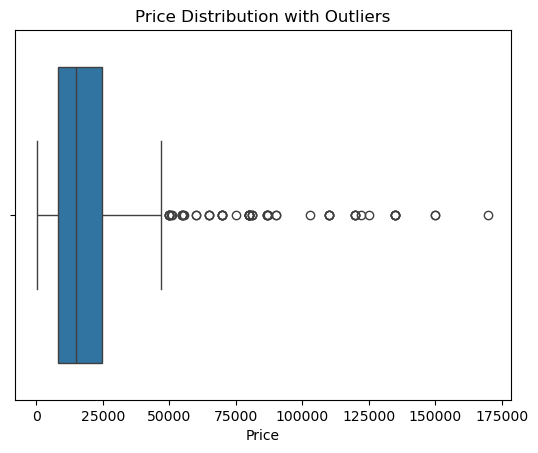

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Price"])
plt.title("Price Distribution with Outliers")
plt.show()


### As we can see there two data types in Statistics 

### Categorical Data
- Brand
- Model
- color

### Numerical Data (Continuous Data and Discrete Data): 

#### Continuous
- price
- screen_size
- battery

#### Discrete 
+ ram
+ rom
+ ratings
+ reviews


### Uni-variate Analysis:

##### Continuous Variables, calculate Central Tendency and Measures of Dispersion .  One can utilize Statistical metrics visualization methods s touch as Box-plot, Histogram/Distribution Plot, Violin Plot, and others.




In [38]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

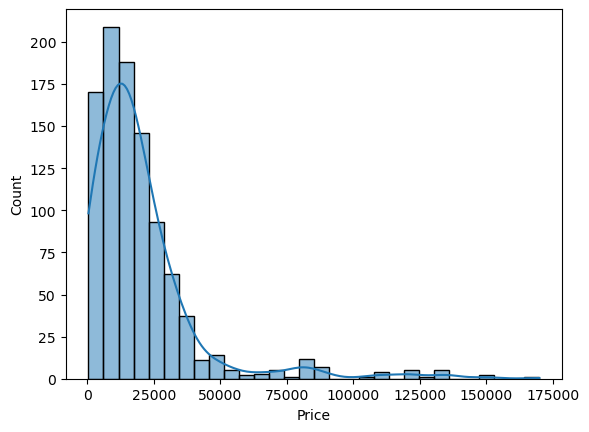

In [24]:
sns.histplot(df["Price"], kde=True,bins=30)

<Axes: xlabel='Battery'>

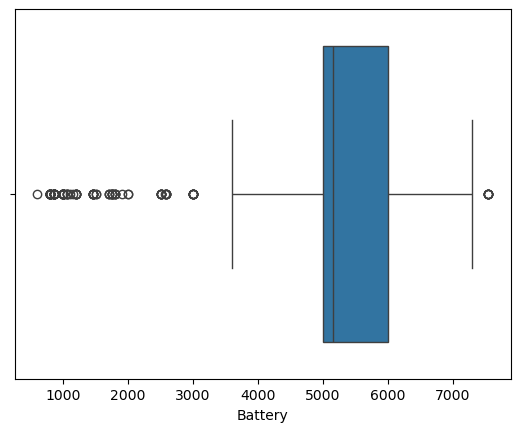

In [46]:
sns.boxplot(x=df['Battery'])

<Axes: xlabel='Screen_size'>

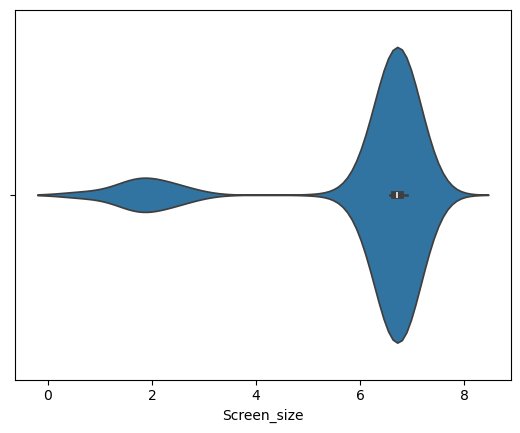

In [26]:
sns.violinplot(x=df["Screen_size"])

### Metrics to Calculate:

+ `Central Tendency:` Mean, Median, Mode

+ `Dispersion:` Standard Deviation, Variance, Range, IQR

In [27]:
print("Average of Price is: ",df["Price"].mean())
print("Median of Price is: ",df["Price"].median())
print("Most frequent value: ",df["Price"].mode()[0])

Average of Price is:  19947.786585365855
Median of Price is:  14999.0
Most frequent value:  9999


In [28]:
print("Spread around the mean: ",df["Price"].std())
print("Square of standard deviation: ",df["Price"].var())
print("Range is: ",(df["Price"].max() - df["Price"].min()))

Spread around the mean:  21606.71935088757
Square of standard deviation:  466850321.1080195
Range is:  169430


#### Categorical Variables, calculate the frequency distribution/Count and percentage of the Categorical variable. One can use plots like count plot, bar plot, pie chart

#### 1. Frequency Count and Percentage

In [4]:
brand_counts = df["Brand"].value_counts()
brand_percent = df["Brand"].value_counts(normalize=True) * 100
brand_summary = pd.DataFrame({
    "Count": brand_counts,
    "Percentage": brand_percent.round(2)
})
print(brand_summary)

          Count  Percentage
Brand                      
realme      137       13.92
Samsung     104       10.57
vivo         83        8.43
REDMI        77        7.83
POCO         62        6.30
OPPO         56        5.69
Tecno        47        4.78
MOTOROLA     42        4.27
IQOO         41        4.17
Kechaoda     36        3.66
Infinix      34        3.46
Apple        31        3.15
LAVA         28        2.85
OnePlus      25        2.54
Motorola     20        2.03
Nothing      17        1.73
itel         16        1.63
Pulse        14        1.42
Nokia        14        1.42
Google       10        1.02
HOTLINE      10        1.02
Jio           8        0.81
KARBONN       8        0.81
Nova          8        0.81
Banety        7        0.71
CMF           7        0.71
Redmi         4        0.41
Moto          4        0.41
hmd           4        0.41
Five          4        0.41
Rastic        3        0.30
UiSmart       3        0.30
Snexian       3        0.30
Jmax          3     

#### 2. Count Plot (Raw Frequencies)

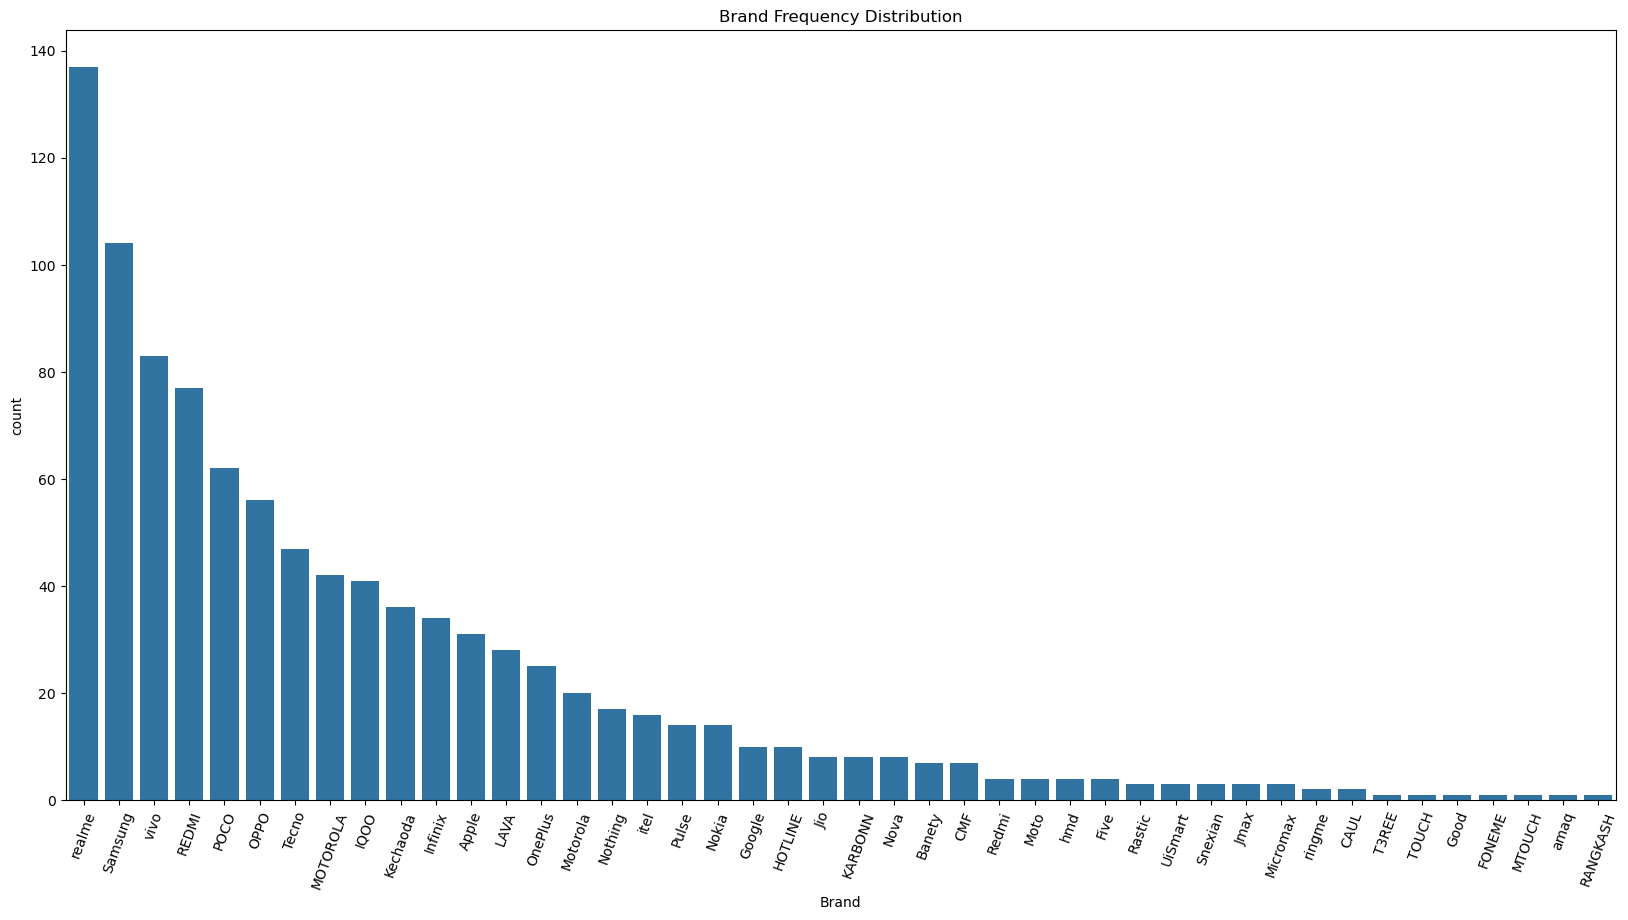

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.countplot(x="Brand", data=df, order=brand_counts.index)
plt.title("Brand Frequency Distribution")
plt.xticks(rotation=70)
plt.show()


#### 3. Bar Plot (Percentages)

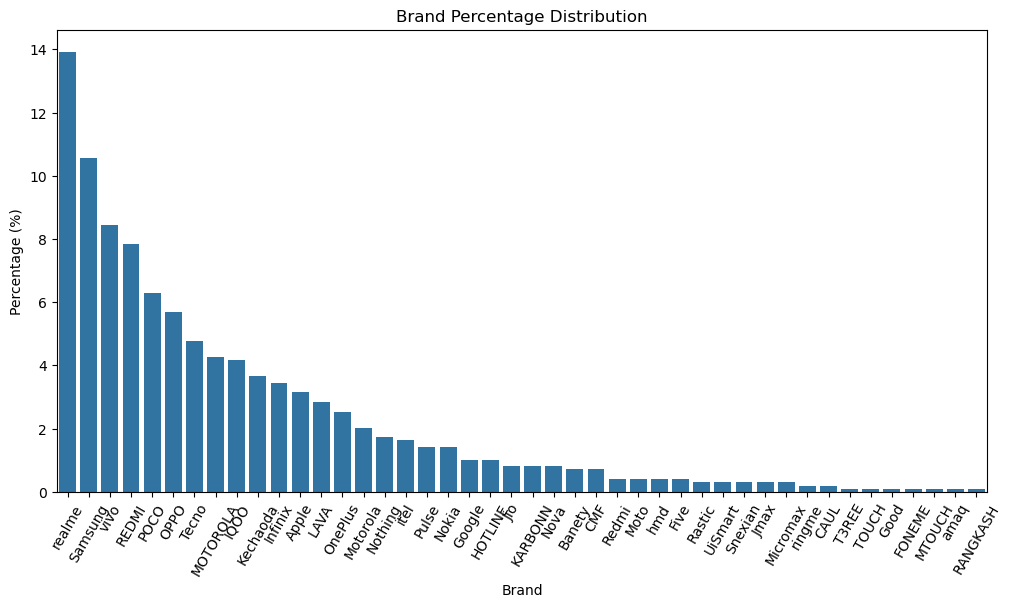

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=brand_summary.index, y=brand_summary["Percentage"])
plt.title("Brand Percentage Distribution")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=60)
plt.show()


In [18]:
df.head()

,Brand,Model,Camera,Color,RAM,ROM,Screen_size,Battery,Price,Ratings,Reviews
0,POCO,C71,32MP Rear Camera | 8MP Front,Cool Blue,6.0,128.0,6.88,5200.0,6799,23011.0,1109.0
1,POCO,C71,32MP Rear Camera | 8MP Front,Desert Gold,4.0,64.0,6.88,5200.0,6199,44601.0,2049.0
2,POCO,M7 5G,50MP Rear Camera | 8MP Front,Mint Green,6.0,128.0,6.88,5160.0,8999,54598.0,2580.0
3,POCO,C75 5G,50MP Rear Camera | 5MP Front,Enchanted Green,4.0,64.0,6.88,5160.0,7699,127288.0,5743.0
4,vivo,T4x 5G,50MP + 2MP | 8MP Front,Glacial Teal,6.0,128.0,6.72,6500.0,14499,177084.0,7943.0


#### 4. Pie Chart (Proportions)

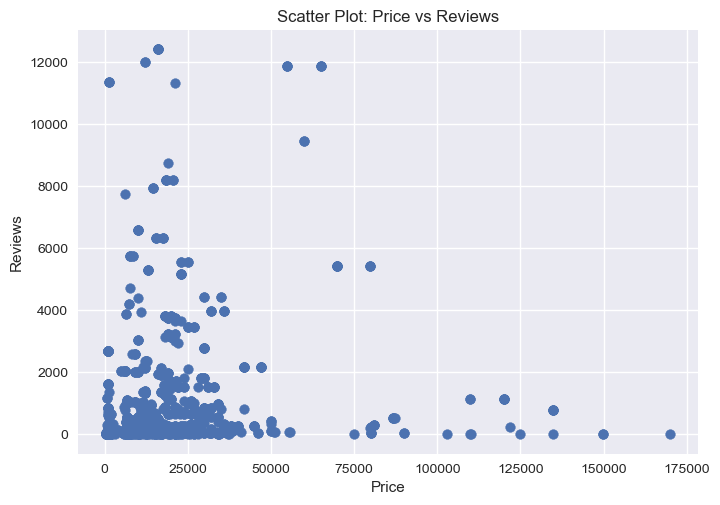

In [32]:
plt.figure()
plt.scatter(df['Price'], df['Reviews'])
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Scatter Plot: Price vs Reviews')
plt.show()


### Bi-variate Analysis/Multivariate : 


#### Do the BiVariate/ Multivariate: Groupby, Pivot, Crosstab.  


In [53]:
round(df.groupby(["Brand","Model"])["Price"].mean(),2)

Brand  Model          
Apple  iPhone 14           59900.00
       iPhone 15           59900.00
       iPhone 16           73650.00
       iPhone 16 Plus      79900.00
       iPhone 16 Pro      116566.67
                            ...    
vivo   Y19 5G              11099.00
       Y19e                 8189.00
       Y31 5G              15599.00
       Y36                 14999.00
       Y400 Pro 5G         25665.67
Name: Price, Length: 221, dtype: float64

#### 1. groupby(): Summarize by Category

In [61]:
df.groupby("Brand")[["Price", "Ratings", "Reviews"]].agg(["mean", "median", "count"])

Price                       Ratings                  \
                  mean   median count           mean    median count   
Brand                                                                  
Apple     96512.903226  79900.0    31  131157.645161  173365.0    31   
Banety      936.285714    929.0     7    4950.000000    4950.0     7   
CAUL       1663.000000   1663.0     2      40.000000      40.0     2   
CMF       19856.142857  18999.0     7   55004.000000   55004.0     7   
FONEME      748.000000    748.0     1     182.000000     182.0     1   
Five        494.250000    499.0     4     525.750000     672.0     4   
Good       1663.000000   1663.0     1    4335.000000    4335.0     1   
Google    62199.000000  44999.0    10    3718.600000    3507.0    10   
HOTLINE     593.600000    499.0    10     963.000000     370.0    10   
IQOO      22056.121951  22200.0    41    2613.634146    2061.0    41   
Infinix   13222.529412  11999.0    34    8345.235294    4336.0    34   
Jio        1328.125000    894.5     8    1432.500000     168.5     8   
Jmax        693.000000    590.0     3      80.000000      75.0     3   
KARBONN    1126.375000   1129.0     8     509.750000     294.0     8   
Kechaoda   1028.305556    974.5    36   23935.111111   29362.0    36   
LAVA       4041.250000   1556.0    28     883.714286     165.0    28   
MOTOROLA  22137.500000  21499.0    42   39705.309524   36959.0    42   
MTOUCH     1992.000000   1992.0     1     141.000000     141.0     1   
Micromax    890.666667    888.0     3     978.000000    1424.0     3   
Moto       7499.000000   7499.0     4     745.000000     745.0     4   
Motorola  16242.100000  15999.0    20  126022.200000   79571.0    20   
Nokia      2476.642857   1919.0    14   42647.785714    7506.0    14   
Nothing   42116.647059  29999.0    17   21553.588235   10955.0    17   
Nova       8999.000000   8999.0     8   14097.000000   15758.0     8   
OPPO      18858.196429  19900.5    56   16492.892857    4654.0    56   
OnePlus   32315.400000  31327.0    25    6979.160000    3967.0    25   
POCO      14773.354839  11999.0    62   29848.870968   15097.0    62   
Pulse      6284.714286   5999.0    14   20210.285714   32992.0    14   
RANGKASH   3249.000000   3249.0     1       9.000000       9.0     1   
REDMI     11499.311688  10999.0    77   11877.883117    7698.0    77   
Rastic      932.000000    949.0     3    4950.000000    4950.0     3   
Redmi      6149.000000   6199.0     4   31148.000000   33212.0     4   
Samsung   29975.528846  18999.0   104   16021.567308    3559.0   104   
Snexian    1171.666667    619.0     3   11696.666667   17388.0     3   
T3REE       949.000000    949.0     1    4950.000000    4950.0     1   
TOUCH      1992.000000   1992.0     1      78.000000      78.0     1   
Tecno     13018.893617  13999.0    47    2074.680851    1105.0    47   
UiSmart    1613.333333   1650.0     3    2909.666667    3638.0     3   
amaq        668.000000    668.0     1      75.000000      75.0     1   
hmd        1071.500000    999.0     4    2839.500000    3612.0     4   
itel       1433.187500   1124.0    16    2850.625000    1290.0    16   
realme    19790.138686  18999.0   137    9022.496350    6373.0   137   
ringme     1749.500000   1749.5     2     296.000000     296.0     2   
vivo      23501.397590  21499.0    83   38869.819277    3499.0    83   

              Reviews                
                 mean  median count  
Brand                                
Apple     4643.903226  5447.0    31  
Banety     308.500000   308.5     7  
CAUL         1.000000     1.0     2  
CMF       3771.000000  3771.0     7  
FONEME       7.000000     7.0     1  
Five        32.000000    42.0     4  
Good       337.000000   337.0     1  
Google     285.800000   262.0    10  
HOTLINE     51.250000    20.5    10  
IQOO       142.658537   116.0    41  
Infinix    694.676471   373.0    34  
Jio         87.500000     9.0     8  
Jmax         6.666667     4.0     3  
KARBONN     27.000000   

#### 2. pivot_table(): Flexible Multi-Dimensional Summary
   
- Use Case: Average Ratings by Brand and ROM

In [62]:
pd.pivot_table(df, values="Ratings", index="Brand", columns="ROM", aggfunc="mean")

ROM,16.0,32.0,64.0,128.0,256.0,512.0
Brand,,,,,,
Apple,NaN,NaN,NaN,186204.230769,96763.705882,249.0
Banety,NaN,NaN,NaN,4950.000000,NaN,NaN
CAUL,NaN,NaN,NaN,40.000000,NaN,NaN
CMF,NaN,NaN,NaN,55004.000000,55004.000000,NaN
FONEME,NaN,NaN,NaN,182.000000,NaN,NaN
Five,NaN,NaN,NaN,525.750000,NaN,NaN
Good,NaN,NaN,NaN,4335.000000,NaN,NaN
Google,NaN,NaN,NaN,10493.000000,2965.888889,NaN
HOTLINE,NaN,NaN,NaN,963.000000,NaN,NaN


`Use Case:` Total Reviews by Brand and RAM

In [64]:
pd.pivot_table(df, values="Reviews", index="Brand", columns="RAM", aggfunc="sum", fill_value=0)

RAM,2.0,3.0,4.0,6.0,8.0,12.0,16.0,46875.0
Brand,,,,,,,,
Apple,0.0,0.0,0.0,0.0,143961.0,0.0,0.0,0.0
Banety,0.0,0.0,0.0,0.0,2159.5,0.0,0.0,0.0
CAUL,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
CMF,0.0,0.0,0.0,0.0,26397.0,0.0,0.0,0.0
FONEME,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
Five,0.0,0.0,0.0,0.0,128.0,0.0,0.0,0.0
Good,0.0,0.0,0.0,0.0,337.0,0.0,0.0,0.0
Google,0.0,0.0,0.0,0.0,2672.0,177.0,9.0,0.0
HOTLINE,0.0,0.0,0.0,0.0,512.5,0.0,0.0,0.0


### 3. crosstab(): Frequency Table for Categorical Variables

##### Count of Models by Brand and RAM

In [65]:
pd.crosstab(df["Brand"], df["RAM"])

RAM,2.0,3.0,4.0,6.0,8.0,12.0,16.0,46875.0
Brand,,,,,,,,
Apple,0,0,0,0,31,0,0,0
Banety,0,0,0,0,7,0,0,0
CAUL,0,0,0,0,2,0,0,0
CMF,0,0,0,0,7,0,0,0
FONEME,0,0,0,0,1,0,0,0
Five,0,0,0,0,4,0,0,0
Good,0,0,0,0,1,0,0,0
Google,0,0,0,0,6,3,1,0
HOTLINE,0,0,0,0,10,0,0,0


In [58]:

numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()
correlation_matrix

,RAM,ROM,Screen_size,Battery,Price,Ratings,Reviews
RAM,1.000000,-0.019428,-0.084914,-0.089937,-0.030973,-0.020500,-0.023642
ROM,-0.019428,1.000000,0.179881,0.268699,0.520827,-0.026532,-0.011469
Screen_size,-0.084914,0.179881,1.000000,0.843932,0.327957,0.051589,0.054624
Battery,-0.089937,0.268699,0.843932,1.000000,0.314947,0.017672,0.013843
Price,-0.030973,0.520827,0.327957,0.314947,1.000000,0.135370,0.084234
Ratings,-0.020500,-0.026532,0.051589,0.017672,0.135370,1.000000,0.961300
Reviews,-0.023642,-0.011469,0.054624,0.013843,0.084234,0.961300,1.000000


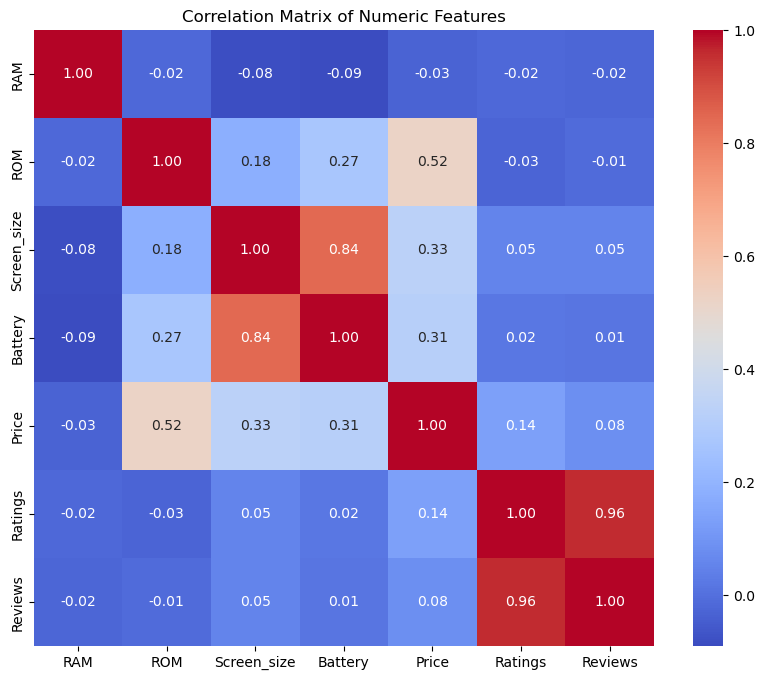

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### Plots we can be drawn based on the data features/columns:

`1. Box Plot` – Detect Outliers & Spread

`Use for:` Continuous variables like Price, Ratings, Battery, etc.

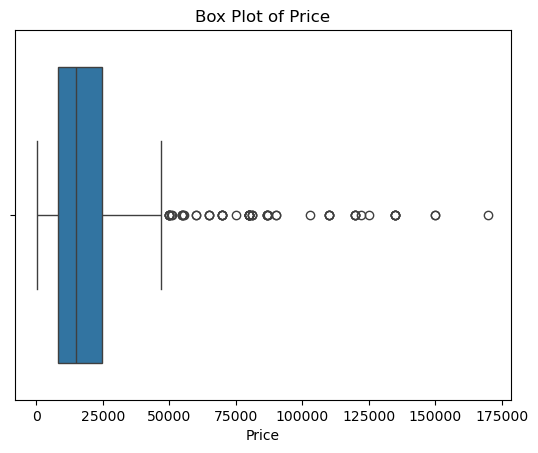

In [68]:
sns.boxplot(x=df["Price"])
plt.title("Box Plot of Price")
plt.show()


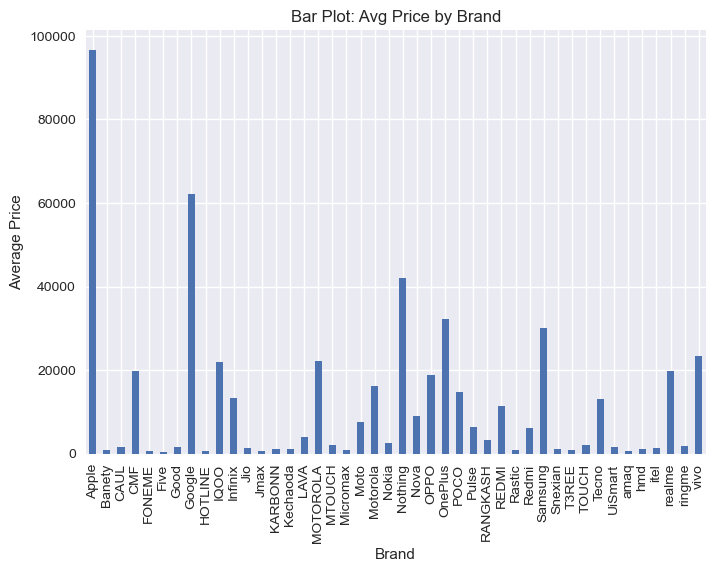

In [33]:
plt.figure()
df.groupby('Brand')['Price'].mean().plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Bar Plot: Avg Price by Brand')
plt.show()


`2. Bar Plot` – Compare Aggregated Values

`Use for:` Mean/median of continuous values grouped by categorical variables.

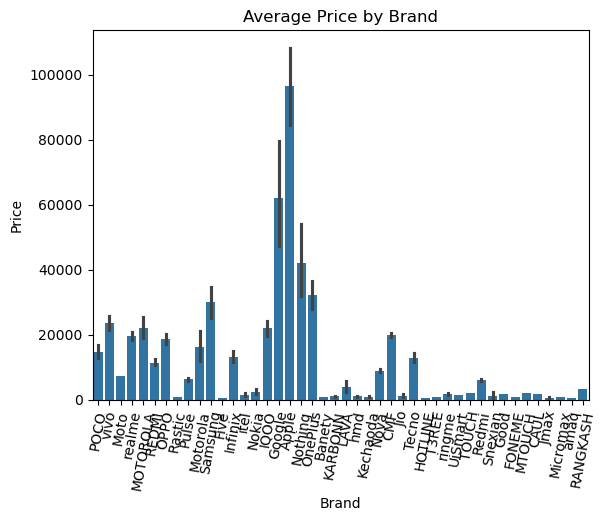

In [72]:
sns.barplot(x="Brand", y="Price", data=df, estimator=np.mean)
plt.title("Average Price by Brand")
plt.xticks(rotation=80)
plt.show()

`3. Scatter Plot` – Relationship Between Two Continuous Variables

`Use for:` Price vs Ratings, Battery vs Screen_size.

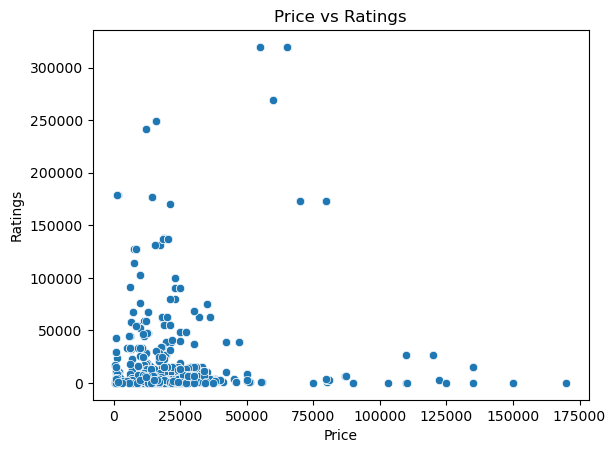

In [77]:
sns.scatterplot(x="Price", y="Ratings", data=df)
plt.title("Price vs Ratings")
plt.show()


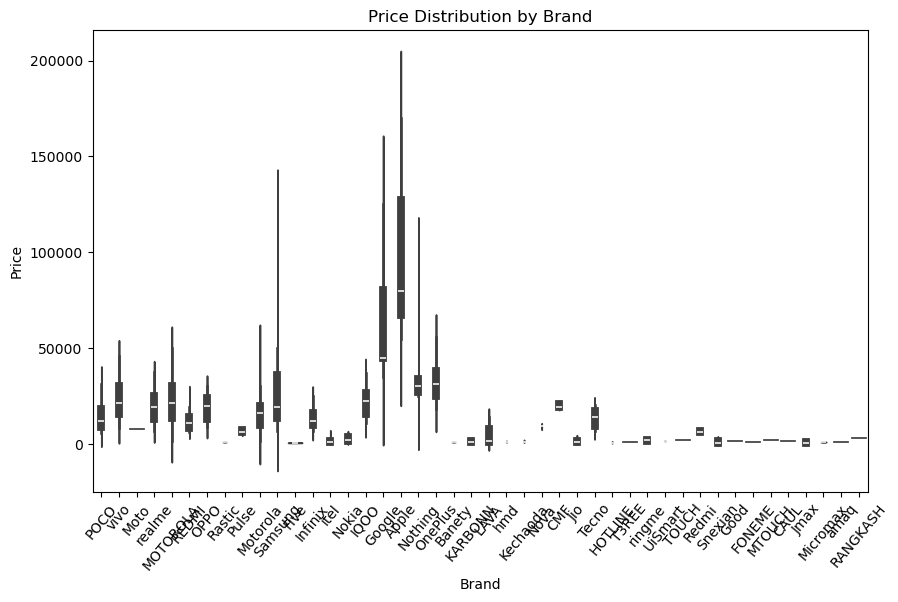

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Brand", y="Price", data=df)
plt.title("Price Distribution by Brand")
plt.xticks(rotation=50)
plt.show()


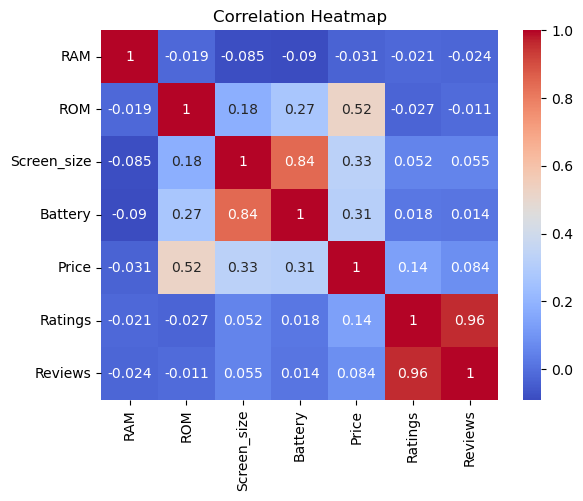

In [79]:
numeric_df = df.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

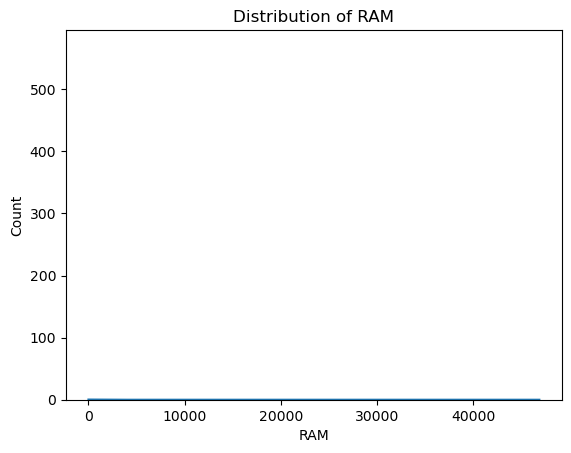

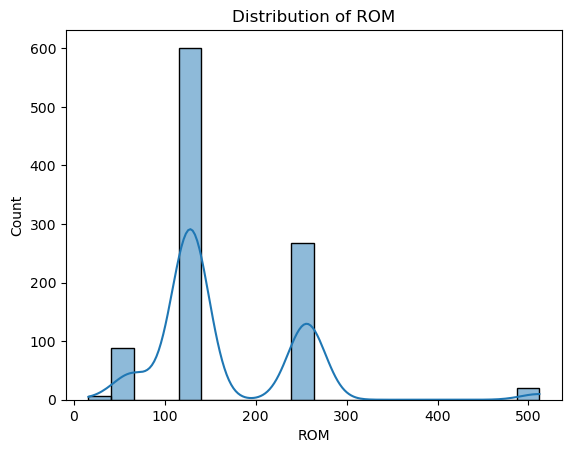

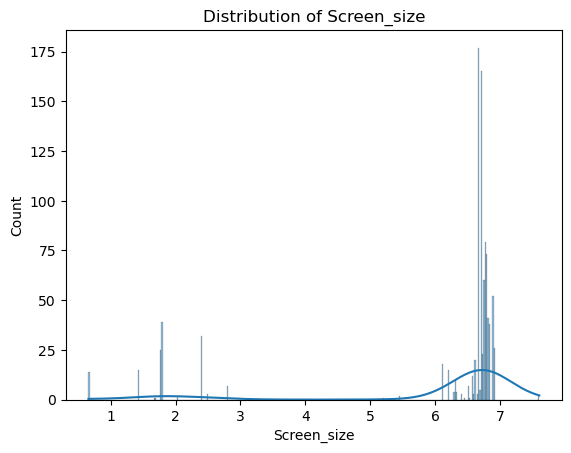

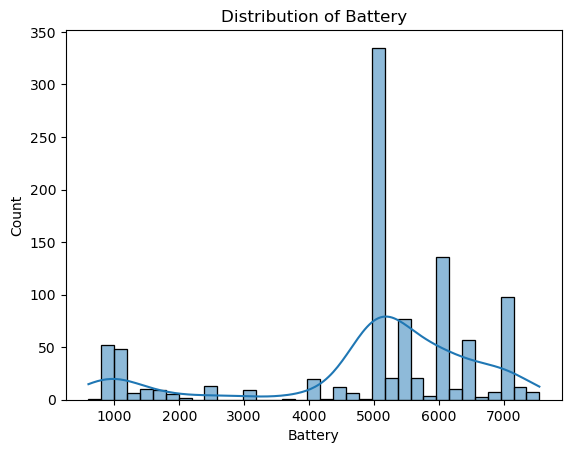

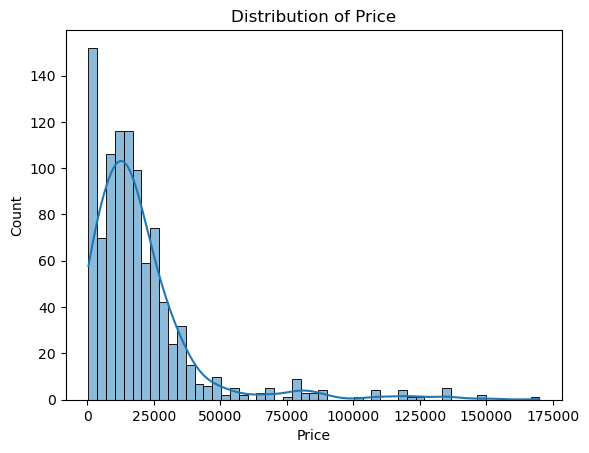

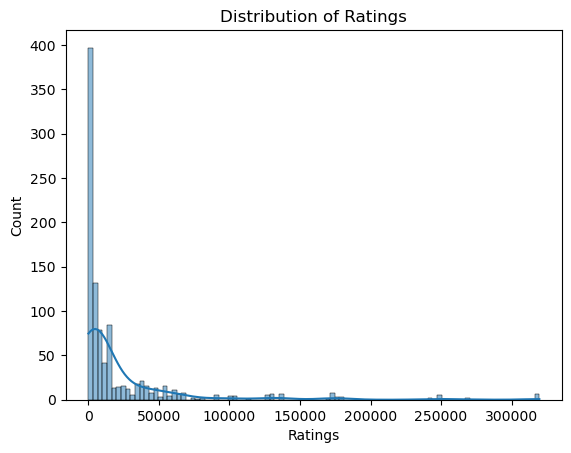

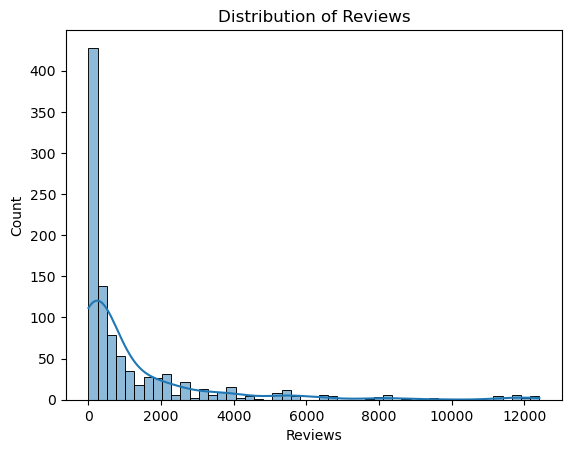

In [81]:
for col in df.select_dtypes(include="number").columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
